In [1]:
import numpy as np
from lib import DualGradientDescent
from lib import Experiments

In [2]:
def sample_batch(n):
    c = np.random.uniform(0, 10, size=[n, n])
    p = np.random.dirichlet(np.ones(n), size=1).ravel()
    q = np.random.dirichlet(np.ones(n), size=1).ravel()
    return c, p, q

In [3]:
n = 40
c, p, q = sample_batch(n)
x, k = DualGradientDescent(gamma=0.05, epsilon=1e-2, n=n).fit(c, p, q)

iteration 5000:   criteria 1 = 0.0256658, criteria 2 = -0.2474279
iteration 10000:   criteria 1 = 0.0141456, criteria 2 = -0.1885392
iteration 15000:   criteria 1 = 0.0096324, criteria 2 = -0.1617641
iteration 20000:   criteria 1 = 0.0072496, criteria 2 = -0.1469809
iteration 25000:   criteria 1 = 0.0058073, criteria 2 = -0.1379122
iteration 30000:   criteria 1 = 0.004845, criteria 2 = -0.1317915
iteration 35000:   criteria 1 = 0.0041555, criteria 2 = -0.1273553
iteration 40000:   criteria 1 = 0.0036366, criteria 2 = -0.1239978
iteration 45000:   criteria 1 = 0.0032326, criteria 2 = -0.1213742


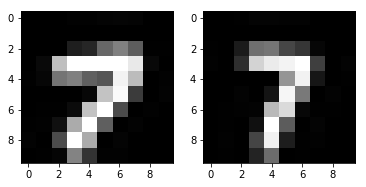

In [8]:
c_, p_, q_ = Experiments.load_data('experiments/test_data/1.png', 'experiments/test_data/2.png', show=True, size=10)
n = p_.shape[0]

In [9]:
x, k = DualGradientDescent(gamma=0.05, epsilon=1e-2, n=n).fit(c_, p_, q_)

iteration 5000:   criteria 1 = 0.0265669, criteria 2 = -0.2716451
iteration 10000:   criteria 1 = 0.0147016, criteria 2 = -0.2051038
iteration 15000:   criteria 1 = 0.0103347, criteria 2 = -0.177832
iteration 20000:   criteria 1 = 0.0080651, criteria 2 = -0.1630663
iteration 25000:   criteria 1 = 0.0066411, criteria 2 = -0.1533913
iteration 30000:   criteria 1 = 0.0056758, criteria 2 = -0.1467923
iteration 35000:   criteria 1 = 0.0049803, criteria 2 = -0.1420276
iteration 40000:   criteria 1 = 0.0044512, criteria 2 = -0.1383686
iteration 45000:   criteria 1 = 0.0040357, criteria 2 = -0.1354954
iteration 50000:   criteria 1 = 0.0037016, criteria 2 = -0.133188
iteration 55000:   criteria 1 = 0.0034261, criteria 2 = -0.1312765
iteration 60000:   criteria 1 = 0.0031941, criteria 2 = -0.1296488
iteration 65000:   criteria 1 = 0.0029947, criteria 2 = -0.1282212
iteration 70000:   criteria 1 = 0.0028203, criteria 2 = -0.1269392
iteration 75000:   criteria 1 = 0.0026663, criteria 2 = -0.125787